# Import required libraries

In [1242]:
import pandas as pd
import gzip
import seaborn as sns

# Get the data 

In [1243]:
data = pd.read_csv('C:/Users/sirid/Downloads/listings/listings.csv')

In [1244]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Data cleaning

In [1245]:
data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [1246]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [1247]:
data = data.drop(columns = ['id','listing_url', 'host_id','scrape_id', 'last_scraped',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url','host_url', 'host_name','host_location', 'host_about', 
       'host_response_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
        'host_total_listings_count', 'host_has_profile_pic',
       'street', 'neighbourhood_cleansed','square_feet',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'notes', 'host_id',
       'is_location_exact','weekly_price', 'monthly_price',
       'guests_included','maximum_nights', 'calendar_updated',
       'availability_60', 'availability_90', 'calendar_last_scraped',
       'first_review', 'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'requires_license','availability_30','review_scores_accuracy',
       'license', 'jurisdiction_names',  'calculated_host_listings_count'])

In [1248]:
data.columns

Index(['name', 'summary', 'host_since', 'host_response_time',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_verifications', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'minimum_nights', 'has_availability',
       'availability_365', 'number_of_reviews', 'last_review',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month'],
      dtype='object')

In [1249]:
data.shape

(3818, 38)

In [1250]:
data = data.drop(columns = ['require_guest_profile_picture','summary','host_acceptance_rate','beds','require_guest_phone_verification','review_scores_value'])

In [1251]:
data.shape

(3818, 32)

In [1252]:
data

,name,host_since,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,neighbourhood,zipcode,latitude,...,minimum_nights,has_availability,availability_365,number_of_reviews,last_review,review_scores_rating,review_scores_cleanliness,instant_bookable,cancellation_policy,reviews_per_month
0,Stylish Queen Anne Apartment,2011-08-11,within a few hours,f,3.0,"['email', 'phone', 'reviews', 'kba']",t,Queen Anne,98119,47.636289,...,1,t,346,207,2016-01-02,95.0,10.0,f,moderate,4.07
1,Bright & Airy Queen Anne Apartment,2013-02-21,within an hour,t,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,Queen Anne,98119,47.639123,...,2,t,291,43,2015-12-29,96.0,10.0,f,strict,1.48
2,New Modern House-Amazing water view,2014-06-12,within a few hours,f,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,Queen Anne,98119,47.629724,...,4,t,220,20,2015-09-03,97.0,10.0,f,strict,1.15
3,Queen Anne Chateau,2013-11-06,NaN,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Queen Anne,98119,47.638473,...,1,t,143,0,NaN,NaN,NaN,f,flexible,NaN
4,Charming craftsman 3 bdm house,2011-11-29,within an hour,f,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,Queen Anne,98119,47.632918,...,1,t,365,38,2015-10-24,92.0,9.0,f,strict,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,3BR Mountain View House in Seattle,2015-04-13,within a few hours,f,354.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,Fremont,98107,47.664295,...,3,t,32,1,2015-09-27,80.0,10.0,f,strict,0.30
3814,Portage Bay View!-One Bedroom Apt,2015-10-14,within an hour,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,Portage Bay,98102,47.649552,...,2,t,273,2,2015-12-24,100.0,10.0,f,moderate,2.00
3815,Private apartment view of Lake WA,2015-12-30,NaN,f,1.0,['phone'],f,NaN,98178,47.508453,...,1,t,88,0,NaN,NaN,NaN,f,moderate,NaN
3816,Amazing View with Modern Comfort!,2015-01-03,within an hour,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,NaN,98112,47.632335,...,3,t,179,0,NaN,NaN,NaN,f,moderate,NaN


In [1253]:
data.isnull().sum(axis = 0)

name                            0
host_since                      2
host_response_time            523
host_is_superhost               2
host_listings_count             2
host_verifications              0
host_identity_verified          2
neighbourhood                 416
zipcode                         7
latitude                        0
longitude                       0
property_type                   1
room_type                       0
accommodates                    0
bathrooms                      16
bedrooms                        6
bed_type                        0
amenities                       0
price                           0
security_deposit             1952
cleaning_fee                 1030
extra_people                    0
minimum_nights                  0
has_availability                0
availability_365                0
number_of_reviews               0
last_review                   627
review_scores_rating          647
review_scores_cleanliness     653
instant_bookab

In [1254]:
data = data.dropna(axis =0)

In [1255]:
data.shape

(1206, 32)

In [1256]:
data.dtypes

name                          object
host_since                    object
host_response_time            object
host_is_superhost             object
host_listings_count          float64
host_verifications            object
host_identity_verified        object
neighbourhood                 object
zipcode                       object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
bed_type                      object
amenities                     object
price                         object
security_deposit              object
cleaning_fee                  object
extra_people                  object
minimum_nights                 int64
has_availability              object
availability_365               int64
number_of_reviews              int64
last_review                   object
r

In [1257]:
data.isnull().sum(axis = 0)

name                         0
host_since                   0
host_response_time           0
host_is_superhost            0
host_listings_count          0
host_verifications           0
host_identity_verified       0
neighbourhood                0
zipcode                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
bed_type                     0
amenities                    0
price                        0
security_deposit             0
cleaning_fee                 0
extra_people                 0
minimum_nights               0
has_availability             0
availability_365             0
number_of_reviews            0
last_review                  0
review_scores_rating         0
review_scores_cleanliness    0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
dtype: i

In [1258]:
data = data.reset_index()

In [1259]:
data['zipcode'] = data['zipcode'].astype('category')
data['host_response_time'] = data['host_response_time'].astype('category')
data['neighbourhood'] = data['neighbourhood'].astype('category')
data['host_is_superhost'] = data['host_is_superhost'].astype('category')
data['host_identity_verified'] = data['host_identity_verified'].astype('category')
data['property_type'] = data['property_type'].astype('category')
data['room_type'] = data['room_type'].astype('category')
data['bed_type'] = data['bed_type'].astype('category')
data['cancellation_policy'] = data['cancellation_policy'].astype('category')
data['instant_bookable'] = data['instant_bookable'].astype('category')

In [1260]:
data['extra_people'].unique()

array(['$0.00', '$25.00', '$15.00', '$20.00', '$50.00', '$60.00',
       '$75.00', '$10.00', '$30.00', '$100.00', '$40.00', '$45.00',
       '$35.00', '$5.00', '$7.00', '$14.00', '$55.00', '$19.00', '$12.00',
       '$29.00', '$28.00', '$17.00', '$250.00', '$18.00', '$9.00',
       '$8.00', '$13.00', '$16.00', '$49.00', '$22.00', '$68.00',
       '$71.00', '$175.00'], dtype=object)

In [1261]:
for i in range(0,len(data['extra_people'])):
    data['extra_people'][i] = (data['extra_people'][i][1:])


C:\Users\sirid\AppData\Local\Temp/ipykernel_26816/272895373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['extra_people'][i] = (data['extra_people'][i][1:])


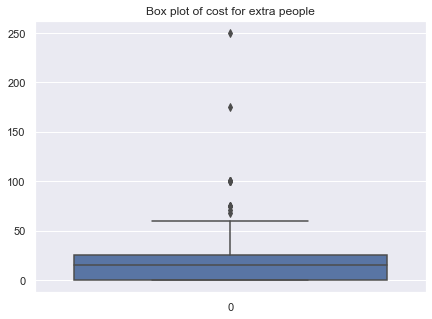

In [1262]:
#sns.set(rc = {'figure.figsize':(15,5)})
sns.boxplot(data = data['extra_people']).set(title = "Box plot of cost for extra people")
data['extra_people'] = pd.to_numeric(data['extra_people']).round(0).astype(int)

In [1263]:
data['price'].unique()

array(['$150.00', '$975.00', '$450.00', '$60.00', '$99.00', '$165.00',
       '$461.00', '$66.00', '$45.00', '$300.00', '$325.00', '$175.00',
       '$222.00', '$159.00', '$348.00', '$110.00', '$130.00', '$145.00',
       '$95.00', '$90.00', '$465.00', '$47.00', '$55.00', '$125.00',
       '$129.00', '$80.00', '$126.00', '$115.00', '$134.00', '$375.00',
       '$97.00', '$120.00', '$135.00', '$224.00', '$338.00', '$85.00',
       '$100.00', '$75.00', '$57.00', '$350.00', '$70.00', '$35.00',
       '$133.00', '$149.00', '$180.00', '$435.00', '$275.00', '$250.00',
       '$69.00', '$98.00', '$190.00', '$105.00', '$196.00', '$209.00',
       '$749.00', '$285.00', '$600.00', '$103.00', '$295.00', '$335.00',
       '$499.00', '$156.00', '$200.00', '$94.00', '$160.00', '$91.00',
       '$199.00', '$104.00', '$122.00', '$158.00', '$65.00', '$40.00',
       '$50.00', '$575.00', '$245.00', '$439.00', '$109.00', '$155.00',
       '$254.00', '$310.00', '$490.00', '$144.00', '$235.00', '$395.00',


In [1264]:
for i in range(0,len(data['price'])):
    data['price'][i] = (data['price'][i][1:])

C:\Users\sirid\AppData\Local\Temp/ipykernel_26816/286746854.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'][i] = (data['price'][i][1:])


In [1265]:
data['price']

0       150.00
1       975.00
2       450.00
3        60.00
4       150.00
         ...  
1201    125.00
1202    100.00
1203    175.00
1204    154.00
1205     79.00
Name: price, Length: 1206, dtype: object

C:\Users\sirid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


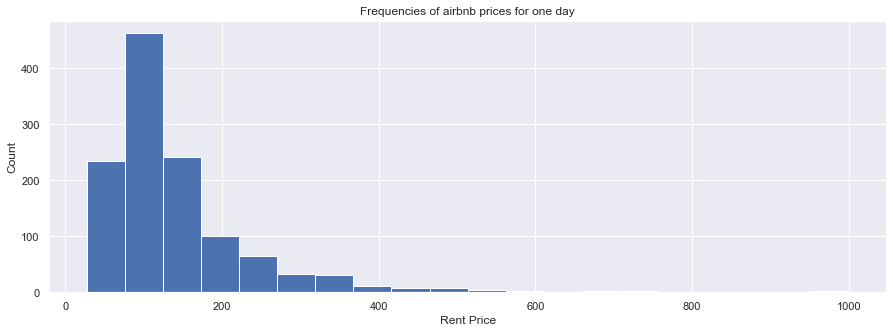

In [1266]:
sns.set(rc = {'figure.figsize':(15,5)})
g = sns.distplot(
    data['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Rent Price', ylabel='Count', title = "Frequencies of airbnb prices for one day")

In [1267]:
data['price'].dtype

dtype('O')

In [1268]:
data['price'] = pd.to_numeric(data['price']).astype(int)

An airbnb which has a daily price of more than 600 is an outlier. It might be yacht. So we can remove these rows. 

In [1269]:
data[data['price']>600]['price']

1      975
84     749
203    775
433    999
462    700
845    750
951    673
Name: price, dtype: int32

<AxesSubplot:>

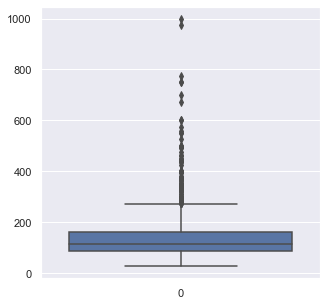

In [1270]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.boxplot(data = data['price'])

In [1271]:
data.drop(data[data.price > 600].index, inplace=True)

C:\Users\sirid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Rent Price'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Airbnb prices for a day in Seatlle')]

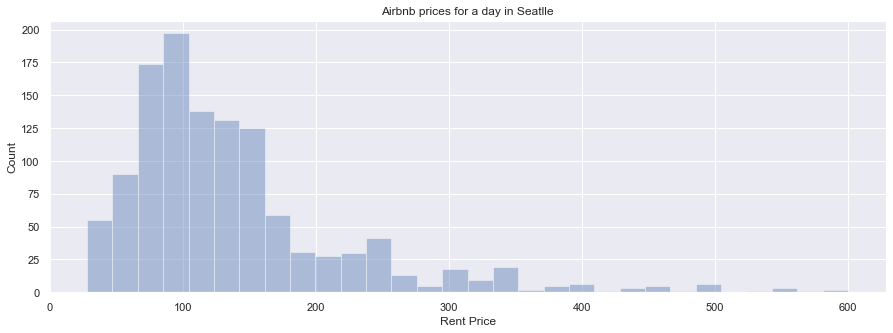

In [1272]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.distplot(
    data['price'], bins=30,kde = False
).set(xlabel='Rent Price', ylabel='Count',title = "Airbnb prices for a day in Seatlle")


Most airbnb prices for one day are around $100

In [1273]:
data['price'].mean()

138.5487906588824

In [1274]:
data['host_since'] = pd.to_datetime(data['host_since'])

[Text(0.5, 1.0, 'Increase in airbnb properties over the years')]

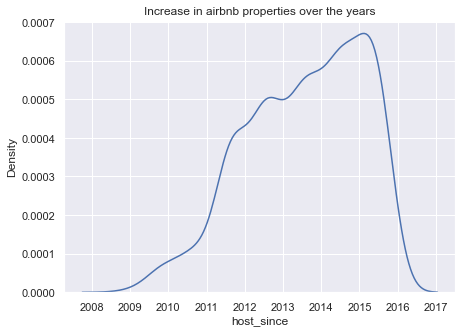

In [1287]:
sns.kdeplot(x = data['host_since']).set(title = "Increase in airbnb properties over the years")

Most airbnb's in Seattle started between 2013 - 2015

In [1276]:
data['last_review']

0       2015-12-29
2       2015-10-24
3       2016-01-01
4       2015-12-20
5       2015-12-16
           ...    
1201    2015-11-29
1202    2015-12-23
1203    2015-10-04
1204    2015-12-27
1205    2015-12-24
Name: last_review, Length: 1199, dtype: object

In [1277]:
data['last_review'] = pd.to_datetime(data['last_review'])

[Text(0.5, 1.0, 'Most recent review for listings over the years')]

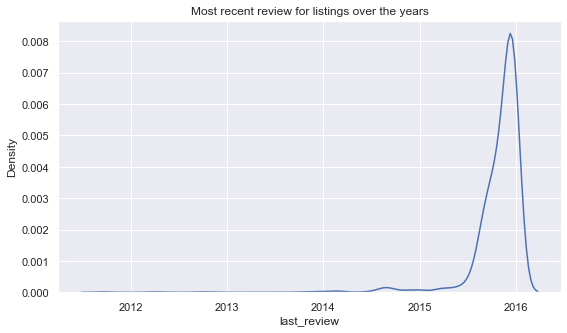

In [1278]:
plt.figure(figsize=(9,5))
sns.kdeplot(x = data['last_review']).set(title = "Most recent review for listings over the years")

Most listings recieved their last review in 2015

[Text(0.5, 1.0, 'Distribution of host response time')]

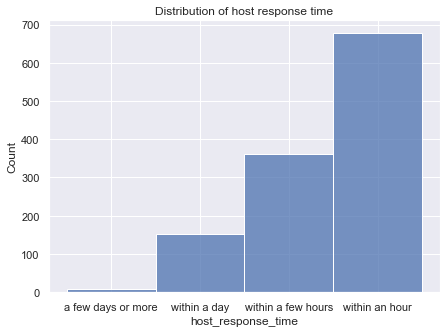

In [1279]:
sns.set(rc = {'figure.figsize':(7,5)})
sns.histplot(x =data['host_response_time']).set(title = "Distribution of host response time")

Most airbnb hosts respond within an hour.

In [1280]:
data['host_listings_count'] = pd.to_numeric(data['host_listings_count']).round(0).astype(int)

In [1281]:
data['host_listings_count'].dtype

dtype('int32')

C:\Users\sirid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='host_listings_count'>

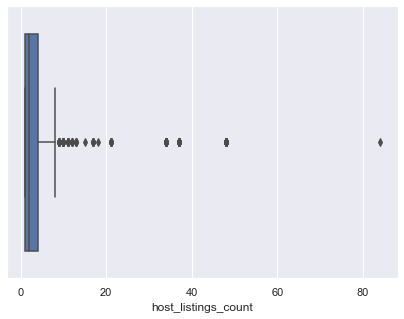

In [1282]:
sns.boxplot(data['host_listings_count'])

Int64Index([387, 406, 407, 410, 441, 443, 444, 457, 466, 470, 478, 479, 488,
            490, 500, 505, 507, 511, 512, 514, 516, 522, 524, 526, 529, 532,
            534, 538, 550, 559, 564, 570, 572, 576, 584, 913, 960],
           dtype='int64')


C:\Users\sirid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'After removing the outliers')]

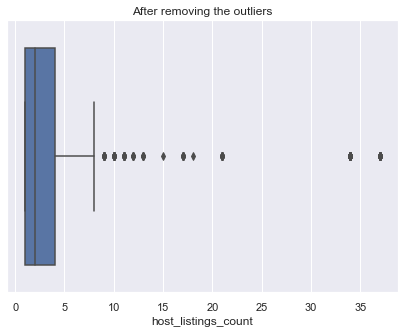

In [1283]:
print(data[data.host_listings_count > 40].index)
data.drop(data[data.host_listings_count > 40].index, inplace=True)
sns.boxplot(data['host_listings_count']).set(title = "After removing the outliers")

Most hosts have less than 5 listings

In [1284]:
data.shape

(1162, 33)

In [1198]:
data = data.reset_index()
data['host_verifications'][0]

"['email', 'phone', 'facebook', 'linkedin', 'reviews', 'jumio']"

In [1199]:
data['host_verifications'][0][1:-1].replace("'",'')

'email, phone, facebook, linkedin, reviews, jumio'

In [1200]:
data['host_verifications'][0][1:-1].replace("'",'').count(',')+1

6

In [1201]:
for i in range(len(data['host_verifications'])):
    data['host_verifications'][i] = data['host_verifications'][i][1:-1].replace("'",'').count(',')+1

C:\Users\sirid\AppData\Local\Temp/ipykernel_26816/222209749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['host_verifications'][i] = data['host_verifications'][i][1:-1].replace("'",'').count(',')+1


In [1202]:
data['host_verifications'].head()

0    6
1    5
2    7
3    6
4    5
Name: host_verifications, dtype: object

In [1203]:
data['host_verifications'] = pd.to_numeric(data['host_verifications']).astype(int)

[Text(0.5, 1.0, 'Histogram of number of host verfications available')]

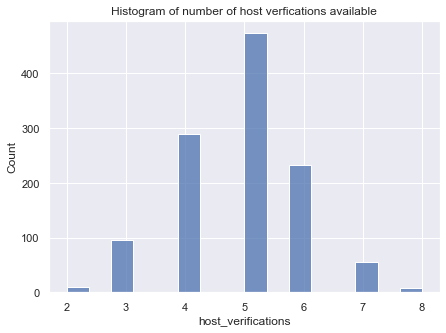

In [1204]:
sns.histplot(data['host_verifications']).set(title ="Histogram of number of host verfications available")

Most hosts have 5 verfication options. 

[Text(0.5, 1.0, 'Is your host verified?')]

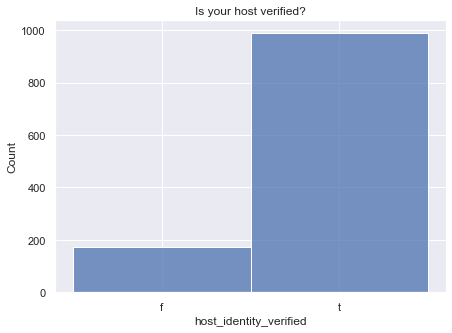

In [1205]:
sns.histplot(data['host_identity_verified']).set(title = "Is your host verified?")

1/6 of the hosts are not verified.

In [1206]:
data['host_is_superhost'].value_counts()/len(data['host_is_superhost'])

f    0.725473
t    0.274527
Name: host_is_superhost, dtype: float64

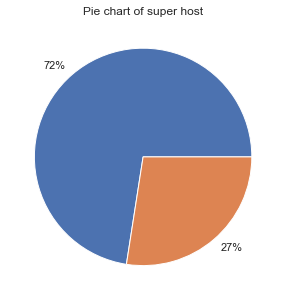

In [1207]:
import matplotlib.pyplot as plt
superhost_value = data['host_is_superhost'].value_counts().tolist()
superhost_labels = ['72%','27%']
plt.pie(superhost_value,labels = superhost_labels)
plt.title("Pie chart of super host")
plt.show()

27% of the hosts are superhosts.

[Text(0.5, 1.0, 'Listings in each zipcode')]

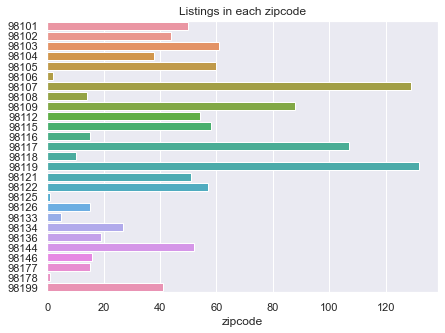

In [1209]:
sns.barplot(y = data['zipcode'].unique(),x = data['zipcode'].value_counts()).set(title = "Listings in each zipcode")

98107,98117 and 98119 have the more the 100 Airbnb listings.

In [1210]:
data['property_type'].value_counts()

House              553
Apartment          509
Condominium         32
Townhouse           31
Loft                13
Bed & Breakfast      8
Cabin                8
Bungalow             3
Camper/RV            3
Other                1
Yurt                 1
Name: property_type, dtype: int64

[Text(0.5, 0, 'Number of properties'),
 Text(0.5, 1.0, 'Bar plot of different properties')]

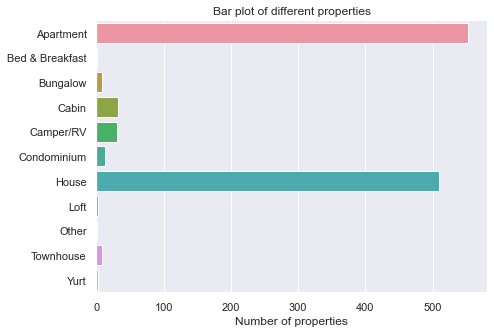

In [1211]:
sns.barplot(y = data['property_type'].unique(),x = data['property_type'].value_counts()).set(xlabel = "Number of properties",title = "Bar plot of different properties")

As expected Houses and Apartments are freuently available as Airbnb's.

In [1285]:
data['room_type'].value_counts()

Entire home/apt    927
Private room       206
Shared room         29
Name: room_type, dtype: int64

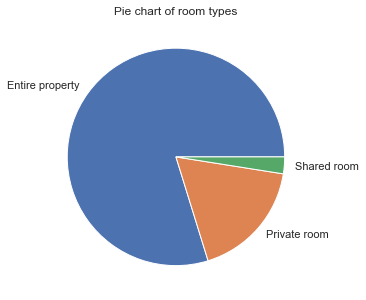

In [1286]:
room_value = data['room_type'].value_counts().tolist()
room_labels = ['Entire property','Private room','Shared room']
plt.pie(room_value,labels = room_labels)
plt.title("Pie chart of room types")
plt.show()

More than 75% of the listings in Seattle are of the entire property.

In [1214]:
for i in range(len(data['amenities'])):
    data['amenities'][i] = data['amenities'][i][1:-1].replace('"','')

C:\Users\sirid\AppData\Local\Temp/ipykernel_26816/918885296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['amenities'][i] = data['amenities'][i][1:-1].replace('"','')


In [1215]:
data['security_deposit'].head()

0    $100.00
1    $700.00
2    $150.00
3    $100.00
4    $500.00
Name: security_deposit, dtype: object

In [1216]:
for i in range(0,len(data['security_deposit'])):
    data['security_deposit'][i] = (data['security_deposit'][i][1:]).replace(',','')

C:\Users\sirid\AppData\Local\Temp/ipykernel_26816/669031279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['security_deposit'][i] = (data['security_deposit'][i][1:]).replace(',','')


In [1217]:
data['security_deposit'].head(10)

0     100.00
1     700.00
2     150.00
3     100.00
4     500.00
5     400.00
6    1500.00
7     100.00
8     100.00
9     500.00
Name: security_deposit, dtype: object

In [1218]:
data['security_deposit'] = pd.to_numeric(data['security_deposit']).round(0).astype(int)

[Text(0.5, 0, 'Security Deposit'), Text(0.5, 1.0, 'KDE on security deposit')]

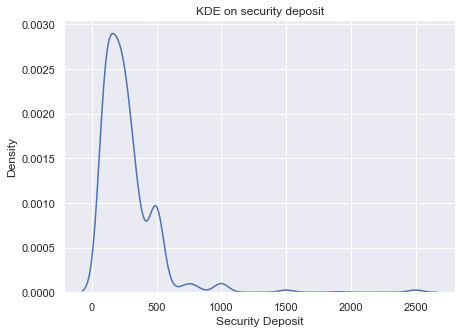

In [1219]:
sns.kdeplot(data['security_deposit']).set(xlabel = "Security Deposit",title = "KDE on security deposit")

The mean security deposit is around $200

In [1220]:
data['cleaning_fee'].unique()

array(['$40.00', '$125.00', '$25.00', '$150.00', '$85.00', '$300.00',
       '$35.00', '$15.00', '$200.00', '$100.00', '$80.00', '$250.00',
       '$99.00', '$75.00', '$30.00', '$60.00', '$50.00', '$45.00',
       '$95.00', '$90.00', '$120.00', '$20.00', '$7.00', '$8.00',
       '$55.00', '$10.00', '$65.00', '$175.00', '$110.00', '$111.00',
       '$72.00', '$105.00', '$160.00', '$28.00', '$195.00', '$145.00',
       '$22.00', '$225.00', '$140.00', '$70.00', '$89.00', '$83.00',
       '$5.00', '$117.00', '$16.00', '$78.00', '$180.00', '$64.00',
       '$79.00', '$130.00', '$61.00', '$88.00', '$38.00', '$135.00',
       '$59.00', '$155.00', '$101.00', '$67.00', '$69.00', '$164.00',
       '$159.00', '$109.00', '$106.00', '$12.00', '$39.00', '$87.00',
       '$42.00', '$71.00', '$18.00', '$108.00', '$149.00', '$17.00',
       '$210.00', '$82.00', '$76.00', '$97.00', '$112.00', '$165.00',
       '$199.00', '$52.00', '$142.00', '$19.00'], dtype=object)

In [1221]:
for i in range(0,len(data['cleaning_fee'])):
    data['cleaning_fee'][i] = (data['cleaning_fee'][i][1:])
data['cleaning_fee'] = pd.to_numeric(data['cleaning_fee']).round(0).astype(int)

C:\Users\sirid\AppData\Local\Temp/ipykernel_26816/3160288133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaning_fee'][i] = (data['cleaning_fee'][i][1:])


C:\Users\sirid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Box plot on Cleaning fee')]

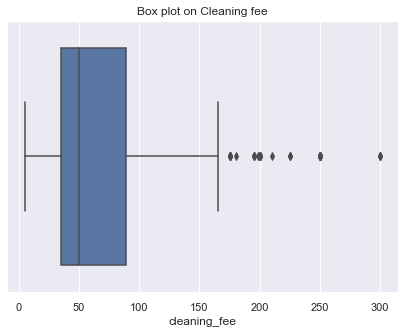

In [1222]:
sns.boxplot(data['cleaning_fee']).set(title = "Box plot on Cleaning fee")

Cleaning fees is less than $100

In [1223]:
data['has_availability'].unique()

array(['t'], dtype=object)

Has availability has true values only, we can delete this column as it does not give us any insight

In [1224]:
data = data.drop(columns = ['has_availability'])

In [1228]:
data = data.drop(columns = ['level_0','index'])
data

,name,host_since,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,neighbourhood,zipcode,latitude,...,extra_people,minimum_nights,availability_365,number_of_reviews,last_review,review_scores_rating,review_scores_cleanliness,instant_bookable,cancellation_policy,reviews_per_month
0,Bright & Airy Queen Anne Apartment,2013-02-21,within an hour,t,6,6,t,Queen Anne,98119,47.639123,...,0,2,291,43,2015-12-29,96.0,10.0,f,strict,1.48
1,Charming craftsman 3 bdm house,2011-11-29,within an hour,f,2,5,t,Queen Anne,98119,47.632918,...,15,1,365,38,2015-10-24,92.0,9.0,f,strict,0.89
2,Tiny Garden cabin on Queen Anne,2012-10-30,within an hour,t,5,7,t,Queen Anne,98119,47.640161,...,0,2,100,173,2016-01-01,97.0,10.0,f,strict,4.73
3,Airy + Bright Queen Anne Apartment,2013-02-21,within an hour,t,6,6,t,Queen Anne,98119,47.637492,...,0,2,324,32,2015-12-20,97.0,10.0,f,strict,1.55
4,Upper Queen Anne Craftsman House,2013-01-06,within a few hours,f,1,5,t,Queen Anne,98119,47.637214,...,0,3,229,8,2015-12-16,97.0,10.0,f,strict,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,Cedar House Studio Suite in Fremont,2011-05-07,within a few hours,t,1,5,t,Fremont,98103,47.660856,...,0,2,358,12,2015-11-29,95.0,10.0,f,strict,2.34
1158,2 BR/1 BA Fremont Apt w/ parking,2012-11-05,within an hour,f,1,6,t,Fremont,98107,47.653158,...,20,2,329,10,2015-12-23,98.0,10.0,f,strict,3.95
1159,Beautiful Craftsman - Fremont 3 Bed,2013-08-05,within a few hours,f,2,4,t,Fremont,98103,47.662036,...,30,3,294,29,2015-10-04,96.0,9.0,f,strict,1.15
1160,Fremont Farmhouse,2011-11-07,within an hour,f,1,5,t,Fremont,98103,47.654205,...,50,2,227,5,2015-12-27,92.0,8.0,f,strict,1.56


Converting name column to string from object data type

In [1229]:
for i in range(0,len(data['name'])):
    data['name'][i] = str(data['name'][i])

C:\Users\sirid\AppData\Local\Temp/ipykernel_26816/2196434093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'][i] = str(data['name'][i])


In [1230]:
data['name']

0        Bright & Airy Queen Anne Apartment
1            Charming craftsman 3 bdm house
2         Tiny Garden cabin on Queen Anne  
3        Airy + Bright Queen Anne Apartment
4          Upper Queen Anne Craftsman House
                       ...                 
1157    Cedar House Studio Suite in Fremont
1158       2 BR/1 BA Fremont Apt w/ parking
1159    Beautiful Craftsman - Fremont 3 Bed
1160                      Fremont Farmhouse
1161      Portage Bay View!-One Bedroom Apt
Name: name, Length: 1162, dtype: object

In [1231]:
data.head()

,name,host_since,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,neighbourhood,zipcode,latitude,...,extra_people,minimum_nights,availability_365,number_of_reviews,last_review,review_scores_rating,review_scores_cleanliness,instant_bookable,cancellation_policy,reviews_per_month
0,Bright & Airy Queen Anne Apartment,2013-02-21,within an hour,t,6,6,t,Queen Anne,98119,47.639123,...,0,2,291,43,2015-12-29,96.0,10.0,f,strict,1.48
1,Charming craftsman 3 bdm house,2011-11-29,within an hour,f,2,5,t,Queen Anne,98119,47.632918,...,15,1,365,38,2015-10-24,92.0,9.0,f,strict,0.89
2,Tiny Garden cabin on Queen Anne,2012-10-30,within an hour,t,5,7,t,Queen Anne,98119,47.640161,...,0,2,100,173,2016-01-01,97.0,10.0,f,strict,4.73
3,Airy + Bright Queen Anne Apartment,2013-02-21,within an hour,t,6,6,t,Queen Anne,98119,47.637492,...,0,2,324,32,2015-12-20,97.0,10.0,f,strict,1.55
4,Upper Queen Anne Craftsman House,2013-01-06,within a few hours,f,1,5,t,Queen Anne,98119,47.637214,...,0,3,229,8,2015-12-16,97.0,10.0,f,strict,0.98


Let us check the data types after all the conversions

In [1232]:
data.dtypes

name                                 object
host_since                   datetime64[ns]
host_response_time                 category
host_is_superhost                  category
host_listings_count                   int32
host_verifications                    int32
host_identity_verified             category
neighbourhood                      category
zipcode                            category
latitude                            float64
longitude                           float64
property_type                      category
room_type                          category
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
bed_type                           category
amenities                            object
price                                 int32
security_deposit                      int32
cleaning_fee                          int32
extra_people                          int32
minimum_nights                  

In [1233]:
data.shape

(1162, 31)

# Data Cleaning for API data

In [1289]:
import requests

url = ('https://newsapi.org/v2/everything?'
       'q=airbnb&'
       'apiKey=7f6e283d4a03474e82d97e9718d32b6e')

response = requests.get(url)

print(response.json)

<bound method Response.json of <Response [200]>>


In [1290]:
jsontxt = response.json()

In [1294]:
response.content

b'{"status":"ok","totalResults":1985,"articles":[{"source":{"id":"wired","name":"Wired"},"author":"Boone Ashworth, Julian Chokkattu","title":"Snap Kills Off Pixy, Its Flying Selfie Drone","description":"Plus: Motorola has a new phone, UE announces a new waterproof speaker, and Airbnb becomes a total buzzkill.","url":"https://www.wired.com/story/snap-kills-pixie-selfie-drone/","urlToImage":"https://media.wired.com/photos/626969ea4fd425eedd37807c/191:100/w_1280,c_limit/Snap-Pixy-Drone-Product-Gear.jpg","publishedAt":"2022-08-20T13:00:00Z","content":"Ding dong, the drone is dead. Pixy, Snaps petite flying selfie camera, is no more.\\r\\nTechnically you can still buy one, but The Wall Street Journalreported this week that the device is done for. Snap \xe2\x80\xa6 [+4542 chars]"},{"source":{"id":"engadget","name":"Engadget"},"author":"Cherlynn Low","title":"Engadget Podcast: Our reviews of the Samsung Galaxy Z Fold 4, Z Flip 4, Watch 5 and Watch 5 Pro","description":"This week, Cherlynn and

In [886]:
filename="NewHeadlines.csv"
MyFILE=open(filename,"w")
WriteThis="Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [887]:
MyFILE=open(filename, "a")


In [888]:
import re
for items in jsontxt["articles"]:
    Source=items["source"]["id"]    
    Date=items["publishedAt"]
    NewDate=Date.split("T")
    Date=NewDate[0]
    ## CLEAN the Title
    ##Replace punctuation with space
    # Accept one or more copies of punctuation         
    # plus zero or more copies of a space
    # and replace it with a single space
    Title=items["title"]
    Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
    
    # and replace it with a single space
    ## NOTE: Using the "^" on the inside of the [] means
    ## we want to look for any chars NOT a-z or A-Z and replace
    ## them with blank. This removes chars that should not be there.
    Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
    Title=Title.replace(',', '')
    Title=' '.join(Title.split())
    Title=re.sub("\n|\r", "", Title)
    ##----------------------------------------------------------
    
    Headline=items["description"]
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [889]:
import pandas as pd
## Read to DF
airbnb_DF=pd.read_csv(filename, error_bad_lines=False)
print(airbnb_DF.head())
# iterating the columns 
for col in airbnb_DF.columns: 
    print(col) 
    
print(airbnb_DF["Headline"])

## REMOVE any rows with NaN in them
airbnb_DF = airbnb_DF.dropna()
print(airbnb_DF["Headline"])

## Create the list of headlines
HeadlineLIST=[]
for next1 in airbnb_DF["Headline"]:
    HeadlineLIST.append(next1)

print("The headline list is")
print(HeadlineLIST)

         Date            Source  \
0  2022-08-20             wired   
1  2022-08-19          engadget   
2  2022-08-17      ars-technica   
3  2022-09-12  business-insider   
4  2022-09-12              None   

                                               Title  \
0        Snap Kills Off Pixy Its Flying Selfie Drone   
1  Engadget Podcast Our reviews of the Samsung Ga...   
2  No more deadly ragers at Airbnb rentals or so ...   
3  Sailing with a stranger I used the app Boatset...   
4  How to Start an Airbnb Business Without Owning...   

                                            Headline  
0  Plus Motorola phone announces waterproof speak...  
1  This week Cherlynn guest host Rutherford joine...  
2  Pilot program reduced banned parties Australia...  
3  Boatsetter Airbnb boats raised million funding...  
4  need know these essential strategies when star...  
Date
Source
Title
Headline
0     Plus Motorola phone announces waterproof speak...
1     This week Cherlynn guest host Rut

C:\Users\sirid\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [890]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sirid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [891]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [892]:
import numpy as np
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc


normalize_corpus = np.vectorize(normalize_document)

In [893]:
norm_corpus = normalize_corpus(HeadlineLIST)

In [894]:
norm_corpus

array(['plus motorola phone announces waterproof speaker airbnb becomes total buzzkill',
       'week cherlynn guest host rutherford joined washington post chris velazco discuss thoughts samsung latest foldables wearables spent close week flip fold ready',
       'pilot program reduced banned parties australia percent company says',
       'boatsetter airbnb boats raised million funding summer like booking hour sailing lesson',
       'need know essential strategies starting airbnb business subleasing first step towards creating long term wealth family future generations',
       'kelly marohl thought vrbo would better property ocean city maryland airbnb helped lock four bookings month',
       'stephanie monroe works hours week maintain airbnb includes price analysis upgrades like solar panels replacing broken decor',
       'company factors reviews length trip judge bookings australia pilotairbnb says deploy anti party technology effort crack guests trash houses booked massive bashes

from sklearn.feature_extraction.text import CountVectorizer
# get bag of words features in sparse format
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

print(cv_matrix)

cv_matrix = cv_matrix.toarray()
cv_matrix

vocab = cv.get_feature_names()
# show document feature vectors
airbnb_vectorized = pd.DataFrame(cv_matrix, columns=vocab)

In [895]:
temp = pd.DataFrame()

In [896]:
temp

""


In [897]:
temp_1 = temp.append(norm_corpus[0].split()).T
for i in range(1,len(norm_corpus)):
    temp_2 = temp.append(norm_corpus[i].split()).T
    temp_1 = pd.concat([temp_1,temp_2])

In [898]:
temp_1['label'] = 'Airbnb'
temp_1

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,label
0,plus,motorola,phone,announces,waterproof,speaker,airbnb,becomes,total,buzzkill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,week,cherlynn,guest,host,rutherford,joined,washington,post,chris,velazco,...,flip,fold,ready,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,pilot,program,reduced,banned,parties,australia,percent,company,says,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,boatsetter,airbnb,boats,raised,million,funding,summer,like,booking,hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,need,know,essential,strategies,starting,airbnb,business,subleasing,first,step,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,pleno,periodo,vacacional,aplicaciones,solemos,usar,aquellas,relacionadas,reserva,hoteles,...,varios,para,ahorrarnos,unos,eurillos,NaN,NaN,NaN,NaN,Airbnb
0,airbnb,fast,company,airbnb,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,airbnb,nova,tecnologia,para,melhorar,vida,donos,veis,vizinhos,vizinhan,...,para,evitar,festas,casas,reservadas,apareceu,primeiro,olhar,digital,Airbnb
0,serena,smith,spent,summer,weekend,airbnb,jersey,shore,laying,pool,...,walking,distance,rental,home,stone,harbor,crossmedia,analy,NaN,Airbnb


# Get text data for 'Seattle' and merge with 'airbnb' data

In [1044]:
url = ('https://newsapi.org/v2/everything?'
       'q=seattle&'
       'apiKey=7f6e283d4a03474e82d97e9718d32b6e')

response1 = requests.get(url)

print(response1.json)

<bound method Response.json of <Response [200]>>


In [1045]:
jsontxt = response1.json()

In [1046]:
filename="TravelHeadlines.csv"
MyFILE=open(filename,"w")
WriteThis="Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

In [1047]:
MyFILE=open(filename, "a")

In [1048]:
import re
for items in jsontxt["articles"]:
    Source=items["source"]["id"]    
    Date=items["publishedAt"]
    NewDate=Date.split("T")
    Date=NewDate[0]
    ## CLEAN the Title
    ##Replace punctuation with space
    # Accept one or more copies of punctuation         
    # plus zero or more copies of a space
    # and replace it with a single space
    Title=items["title"]
    Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(' +', ' ', Title, flags=re.IGNORECASE)
    Title=re.sub(r'\"', ' ', Title, flags=re.IGNORECASE)
    
    # and replace it with a single space
    ## NOTE: Using the "^" on the inside of the [] means
    ## we want to look for any chars NOT a-z or A-Z and replace
    ## them with blank. This removes chars that should not be there.
    Title=re.sub(r'[^a-zA-Z]', " ", Title, flags=re.VERBOSE)
    Title=Title.replace(',', '')
    Title=' '.join(Title.split())
    Title=re.sub("\n|\r", "", Title)
    ##----------------------------------------------------------
    
    Headline=items["description"]
    Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
    Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
    ## Be sure there are no commas in the headlines or it will
    ## write poorly to a csv file....
    Headline=Headline.replace(',', '')
    Headline=' '.join(Headline.split())
    Headline=re.sub("\n|\r", "", Headline)
    
    ### AS AN OPTION - remove words of a given length............
    Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    WriteThis=str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
    
    MyFILE.write(WriteThis)
    
## CLOSE THE FILE
MyFILE.close()

In [1049]:
travel_DF=pd.read_csv(filename)
print(travel_DF.head())
# iterating the columns 
for col in travel_DF.columns: 
    print(col) 
    
print(travel_DF["Headline"])

## REMOVE any rows with NaN in them
travel_DF = travel_DF.dropna()
print(travel_DF["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
HeadlineLIST=[]
for next1 in travel_DF["Headline"]:
    HeadlineLIST.append(next1)

print("The headline list is")
print(HeadlineLIST)

         Date   Source                                              Title  \
0  2022-09-12     None  Seattle Had the Worst Air Quality of Any Major...   
1  2022-09-02     None  From Slough to Seattle the challenges facing S...   
2  2022-08-19     None  Seattle just had one of its hottest nights on ...   
3  2022-08-12    wired  Want to Run on the Beach Start With the Right ...   
4  2022-09-07  reuters  Seattle cancels first day of school as teacher...   

                                            Headline  
0  quality Seattle Washington enough make city mo...  
1  Surprise move Seattle comes global coffee chai...  
2  nightly temperature reached degrees Fahrenheit...  
3  only thing better than long walk beach long Th...  
4  Seattle teachers will picket lines Wednesday w...  
Date
Source
Title
Headline
0     quality Seattle Washington enough make city mo...
1     Surprise move Seattle comes global coffee chai...
2     nightly temperature reached degrees Fahrenheit...
3     only t

In [1050]:
norm_corpus = normalize_corpus(HeadlineLIST)

In [1051]:
norm_corpus

array(['quality seattle washington enough make city polluted world saturday amid ongoing wildfires around major cities pacific northwest metropolis reached worst list according iqair',
       'surprise move seattle comes global coffee chain faces unionisation drivewhen reckitt benckiser announced surprise departure chief executive laxman narasimhan thursday durex dettol maker cited personal family reasons',
       'nightly temperature reached degrees fahrenheit three nights city climate record nighttime temperature rose degrees',
       'thing better long walk beach long kicks held best sand',
       'seattle teachers picket lines wednesday would first school fall tens thousands students voting strike staffing mental health support',
       'jose ramirez double keyed three eighth inning cleveland guardians rallied victory saturday seattle night ichiro suzuki inducted mariners hall fame',
       'ildemaro vargas tiebreaking homer outs ninth inning washington nationals seattle wednesday 

In [1052]:
temp = pd.DataFrame()

In [1053]:
temp_4 = temp.append(norm_corpus[0].split()).T
for i in range(1,len(norm_corpus)):
    temp_5 = temp.append(norm_corpus[i].split()).T
    temp_4 = pd.concat([temp_4,temp_5])

In [1054]:
temp_4

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,quality,seattle,washington,enough,make,city,polluted,world,saturday,amid,...,reached,worst,list,according,iqair,NaN,NaN,NaN,NaN,NaN
0,surprise,move,seattle,comes,global,coffee,chain,faces,unionisation,drivewhen,...,narasimhan,thursday,durex,dettol,maker,cited,personal,family,reasons,NaN
0,nightly,temperature,reached,degrees,fahrenheit,three,nights,city,climate,record,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,thing,better,long,walk,beach,long,kicks,held,best,sand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,seattle,teachers,picket,lines,wednesday,would,first,school,fall,tens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,trying,home,good,luck,silver,lining,buyers,though,home,prices,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,price,made,waves,announced,would,phase,minimum,wage,employees,stepping,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,vegas,aces,face,connecticut,wnba,finals,watch,games,espn,cable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,seattle,mariners,rookie,sensation,julio,rodriguez,finalizing,extension,team,could,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1055]:
temp_4['label'] = 'Seattle'

In [1056]:
temp_4

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,label
0,quality,seattle,washington,enough,make,city,polluted,world,saturday,amid,...,worst,list,according,iqair,NaN,NaN,NaN,NaN,NaN,Seattle
0,surprise,move,seattle,comes,global,coffee,chain,faces,unionisation,drivewhen,...,thursday,durex,dettol,maker,cited,personal,family,reasons,NaN,Seattle
0,nightly,temperature,reached,degrees,fahrenheit,three,nights,city,climate,record,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
0,thing,better,long,walk,beach,long,kicks,held,best,sand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
0,seattle,teachers,picket,lines,wednesday,would,first,school,fall,tens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,trying,home,good,luck,silver,lining,buyers,though,home,prices,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
0,price,made,waves,announced,would,phase,minimum,wage,employees,stepping,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
0,vegas,aces,face,connecticut,wnba,finals,watch,games,espn,cable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
0,seattle,mariners,rookie,sensation,julio,rodriguez,finalizing,extension,team,could,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle


In [1057]:
transaction_data = pd.concat([temp_1,temp_4])

In [1058]:
transaction_data

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,label
0,plus,motorola,phone,announces,waterproof,speaker,airbnb,becomes,total,buzzkill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,week,cherlynn,guest,host,rutherford,joined,washington,post,chris,velazco,...,flip,fold,ready,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,pilot,program,reduced,banned,parties,australia,percent,company,says,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,boatsetter,airbnb,boats,raised,million,funding,summer,like,booking,hour,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
0,need,know,essential,strategies,starting,airbnb,business,subleasing,first,step,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Airbnb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,trying,home,good,luck,silver,lining,buyers,though,home,prices,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
0,price,made,waves,announced,would,phase,minimum,wage,employees,stepping,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
0,vegas,aces,face,connecticut,wnba,finals,watch,games,espn,cable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle
0,seattle,mariners,rookie,sensation,julio,rodriguez,finalizing,extension,team,could,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Seattle


# Relplots 

In [1024]:
data.dtypes

name                                 object
host_since                   datetime64[ns]
host_response_time                 category
host_is_superhost                  category
host_listings_count                   int32
host_verifications                    int32
host_identity_verified             category
neighbourhood                      category
zipcode                            category
latitude                            float64
longitude                           float64
property_type                      category
room_type                          category
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
bed_type                           category
amenities                            object
square_feet                         float64
price                                 int32
security_deposit                      int32
cleaning_fee                          int32
extra_people                    

In [1299]:
data.describe()

,index,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,reviews_per_month
count,1162.000000,1162.000000,1162.000000,1162.000000,1162.00000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000
mean,1815.604131,4.457831,47.628866,-122.333251,3.89759,1.305508,1.432014,136.827883,14.530120,2.216007,252.314114,26.158348,94.343373,9.572289,2.040129
std,1118.202178,7.754992,0.042691,0.033087,2.23372,0.627084,0.993141,87.059553,17.854987,2.021159,119.170346,32.714605,7.067168,0.777830,1.686766
min,1.000000,1.000000,47.510164,-122.417219,1.00000,0.500000,0.000000,28.000000,0.000000,1.000000,0.000000,1.000000,20.000000,4.000000,0.030000
25%,796.250000,1.000000,47.609136,-122.355519,2.00000,1.000000,1.000000,85.000000,0.000000,1.000000,154.000000,5.000000,93.000000,9.000000,0.772500
50%,1821.500000,2.000000,47.624990,-122.329007,4.00000,1.000000,1.000000,114.000000,11.000000,2.000000,308.000000,14.000000,96.000000,10.000000,1.535000
75%,2742.750000,4.000000,47.662025,-122.309705,5.00000,1.500000,2.000000,155.000000,25.000000,3.000000,358.000000,33.000000,99.000000,10.000000,2.937500
max,3814.000000,37.000000,47.732647,-122.259947,16.00000,4.500000,6.000000,600.000000,250.000000,31.000000,365.000000,278.000000,100.000000,10.000000,11.010000


Text(0.5, 1.0, 'Heatmap of all numerical attributes')

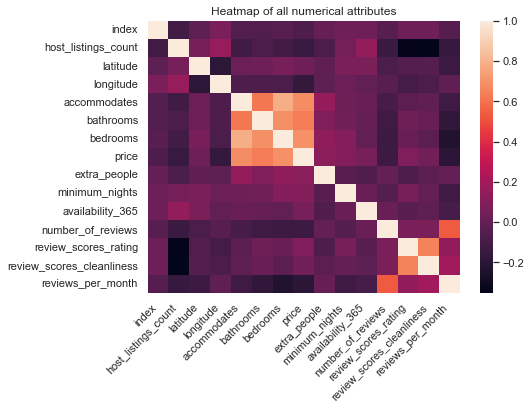

In [1298]:
corr = data.corr()
ax = sns.heatmap(
    corr)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Heatmap of all numerical attributes")

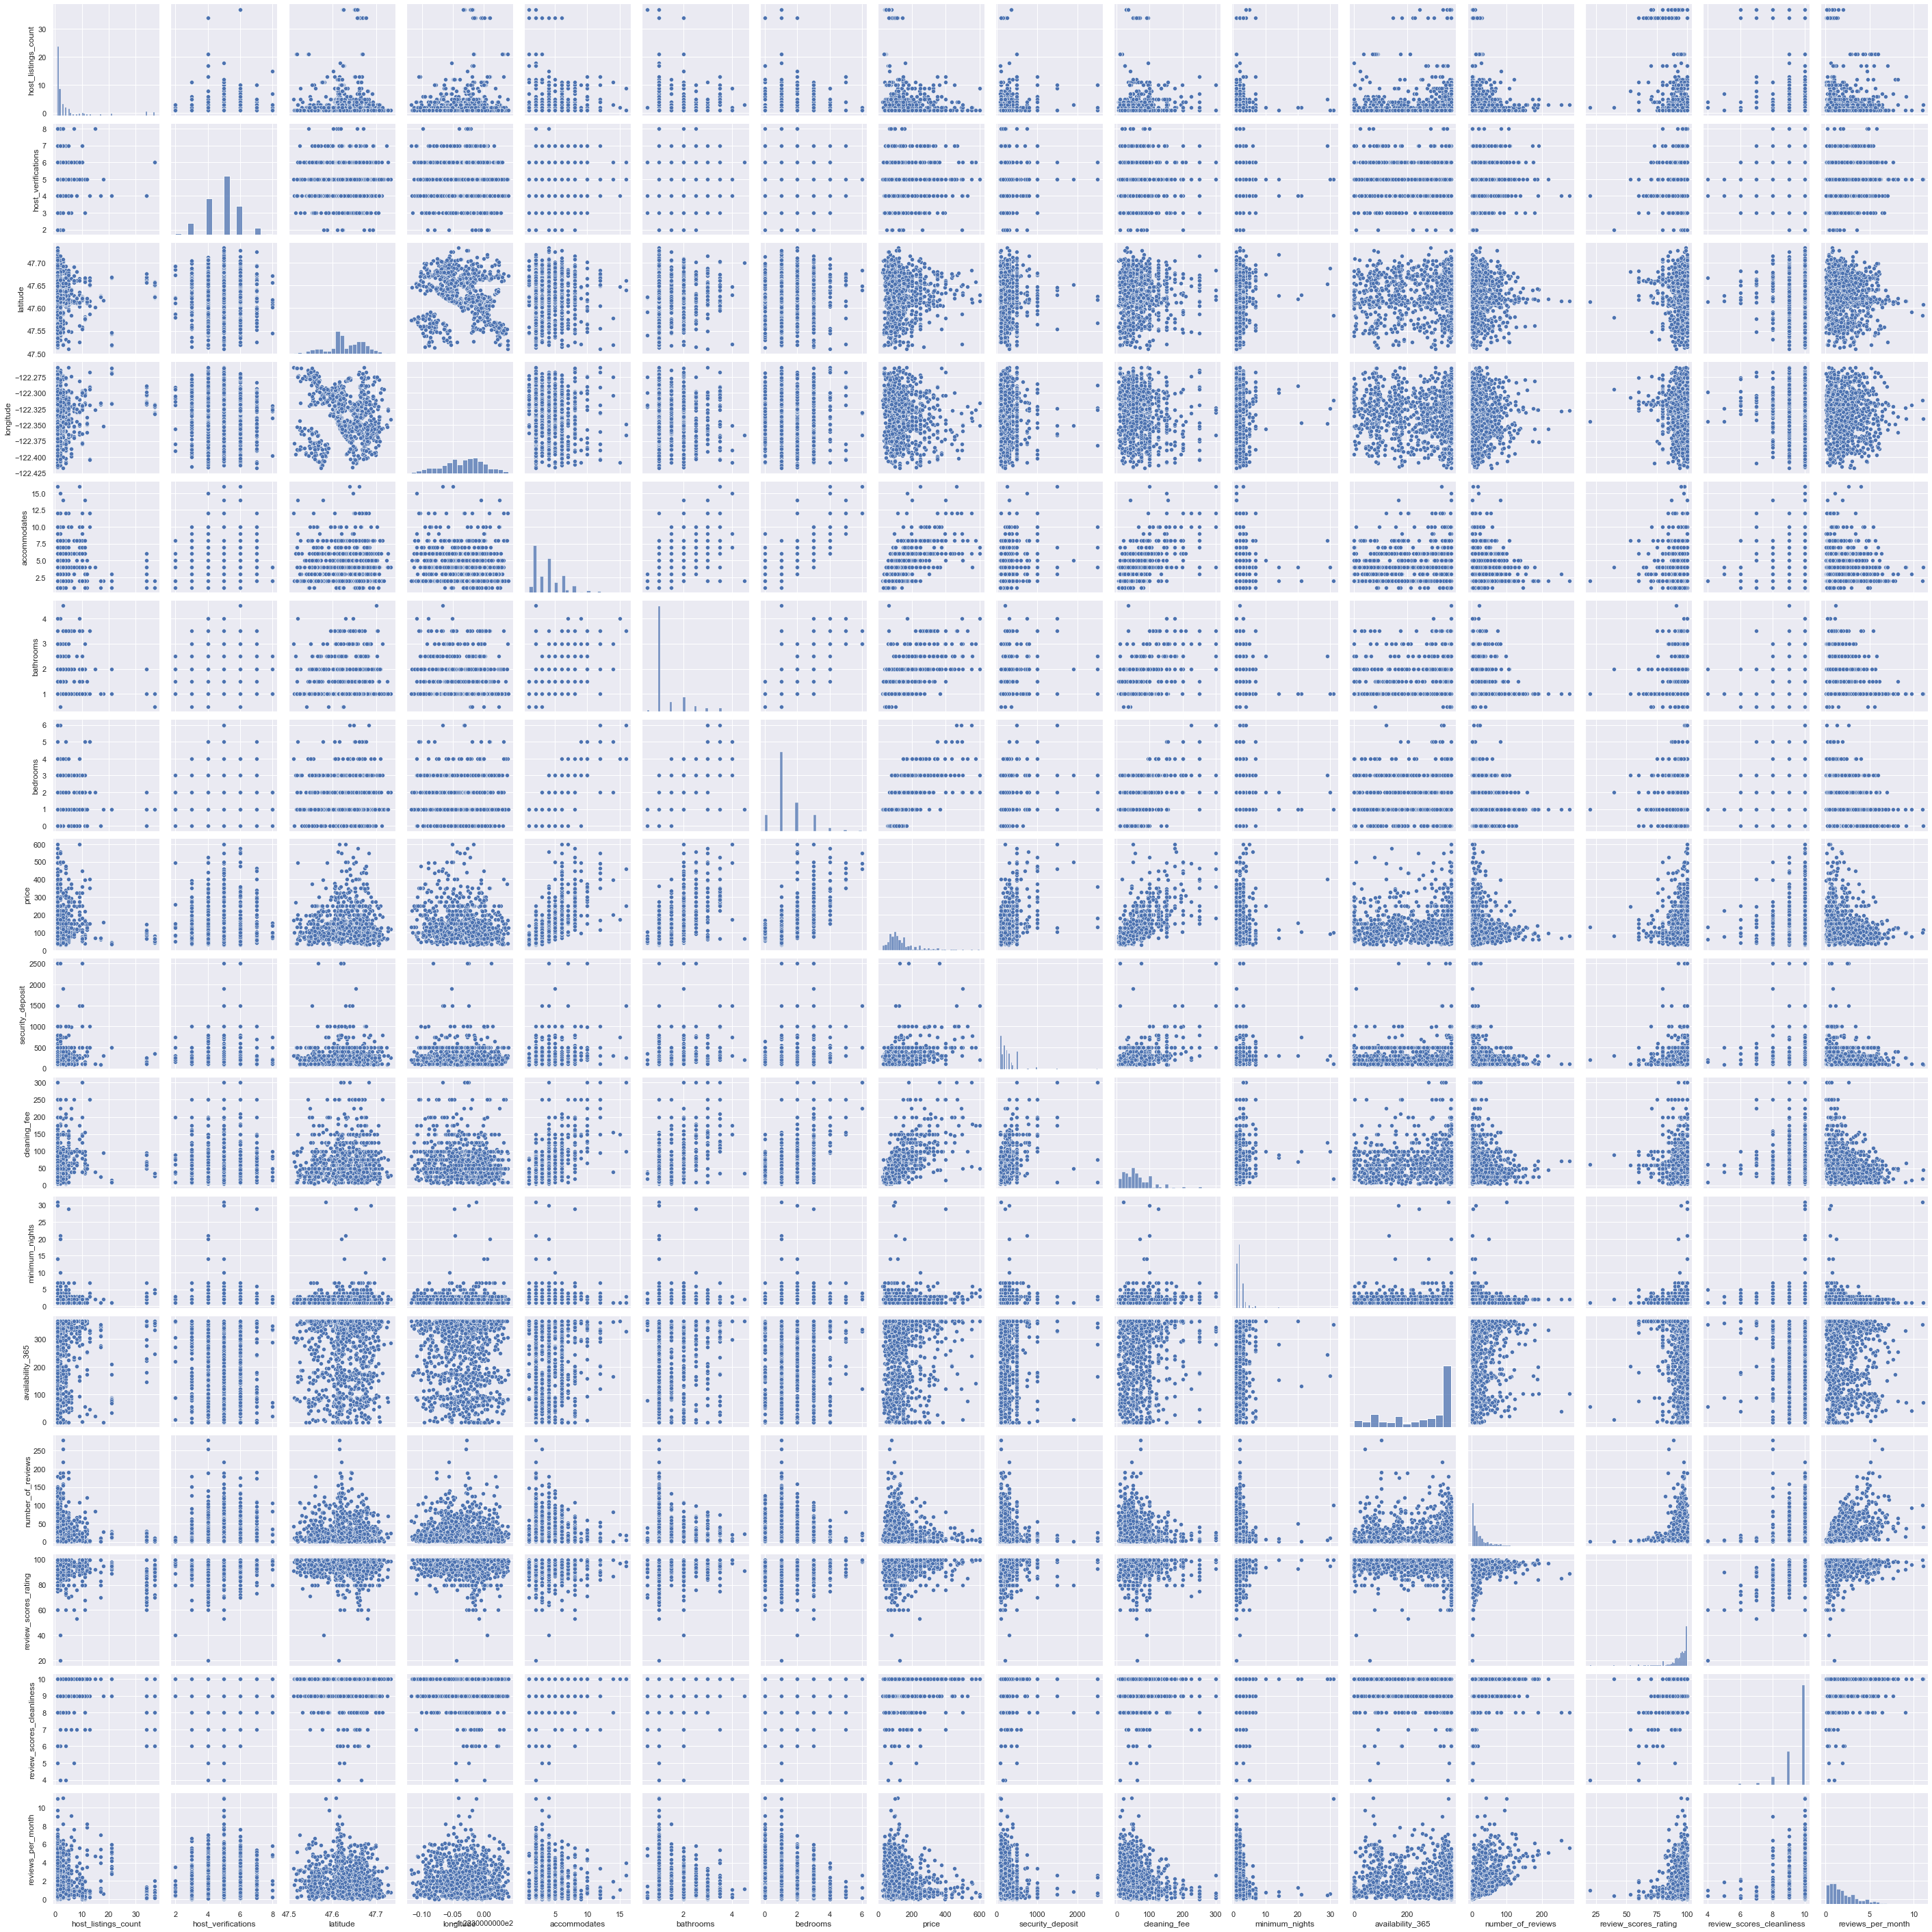

In [915]:
sns.pairplot(data)

number_of_reviews,accomodates hostverification,numofreviews

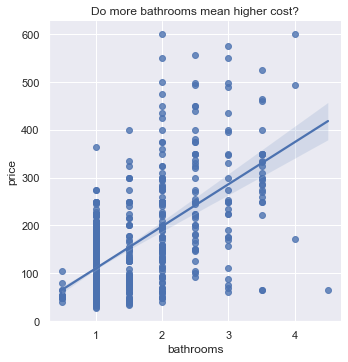

In [925]:
sns.lmplot(x = 'bathrooms',y ='price',data = data).set(title = "Do more bathrooms mean higher cost?")

As the number of bathrooms increase the price increases proportionally

[Text(0.5, 1.0, 'Cleaning cost VS price')]

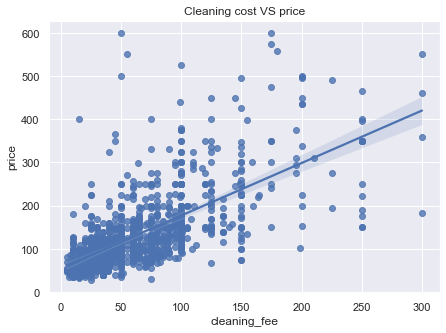

In [917]:
sns.regplot(x = data['cleaning_fee'],y =data['price']).set(title = "Cleaning cost VS price")

As the price increases the cleaning fee increases

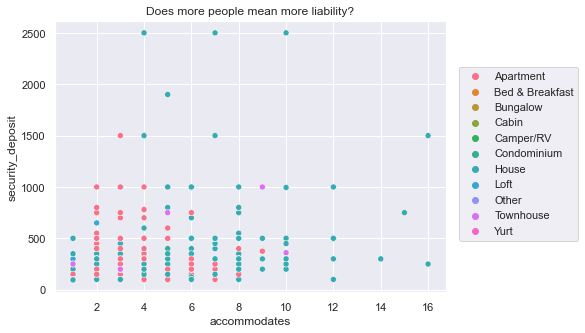

In [923]:
sns.scatterplot(x ='accommodates',y ='security_deposit',hue ='property_type', data = data).set(title = "Does more people mean more liability?")
plt.legend(bbox_to_anchor=(1.02, 0.85), loc='upper left')

Surprisingly as the number of people the porperty can accommodate increases the security deposit does not increase.

[Text(0.5, 1.0, 'Costliest zipcode in Seattle')]

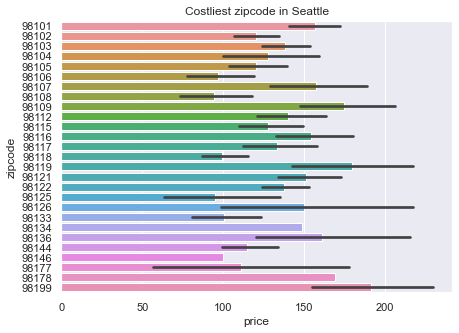

In [941]:
sns.barplot(x ='price',y ='zipcode',data = data ).set(title = "Costliest zipcode in Seattle")

98119 is the costliest neighbourhood in Seattle

<AxesSubplot:xlabel='availability_365', ylabel='price'>

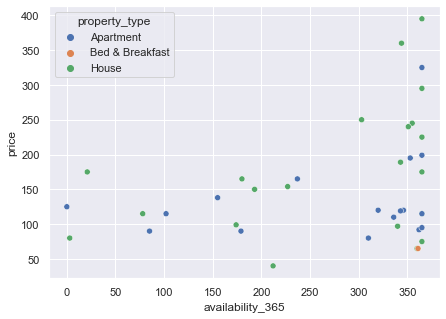

In [1027]:
sns.scatterplot(x ='availability_365',y ='price',hue ='property_type', data = data).set(title = "")

Bed and Breakfasts are almost always available and affordable